# EDA - PSML

## EDA - CAISO_zone_1_.csv

In [1]:
import pandas as pd

path = "/workspaces/amos2025ws03-rtdip-timeseries-forecasting/amos_team_resources/psml/eda/data/PSML/Minute-level Load and Renewable/CAISO_zone_1_.csv"

df  = pd.read_csv(path)

In [ ]:
# general info
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573923 entries, 0 to 1573922
Data columns (total 12 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   time                1573923 non-null  object 
 1   load_power          1573923 non-null  float64
 2   wind_power          1573923 non-null  float64
 3   solar_power         1573923 non-null  float64
 4   DHI                 1573923 non-null  float64
 5   DNI                 1573923 non-null  float64
 6   GHI                 1573923 non-null  float64
 7   Dew Point           1573923 non-null  float64
 8   Solar Zenith Angle  1573923 non-null  float64
 9   Wind Speed          1573923 non-null  float64
 10  Relative Humidity   1573923 non-null  float64
 11  Temperature         1573923 non-null  float64
dtypes: float64(11), object(1)
memory usage: 144.1+ MB


,load_power,wind_power,solar_power,DHI,DNI,GHI,Dew Point,Solar Zenith Angle,Wind Speed,Relative Humidity,Temperature
count,1.573923e+06,1.573923e+06,1.573923e+06,1.573923e+06,1.573923e+06,1.573923e+06,1.573923e+06,1.573923e+06,1.573923e+06,1.573923e+06,1.573923e+06
mean,1.000285e+00,4.094728e-02,1.929054e-01,5.279197e+01,3.004615e+02,2.308321e+02,5.239006e+00,8.971457e+01,1.793068e+00,4.748814e+01,1.937971e+01
std,2.302734e-01,7.668627e-02,2.640614e-01,7.680996e+01,3.829137e+02,3.176412e+02,6.742682e+00,3.910213e+01,1.286541e+00,2.576847e+01,8.480562e+00
min,6.368251e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.770000e+01,1.059000e+01,0.000000e+00,2.000000e+00,-1.000000e+00
25%,8.375664e-01,2.229914e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.500000e+00,5.771000e+01,8.000000e-01,2.569000e+01,1.280000e+01
50%,9.494250e-01,7.037277e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.600000e+00,8.938400e+01,1.400000e+00,4.334400e+01,1.830000e+01
75%,1.077402e+00,3.881967e-02,4.035105e-01,8.780000e+01,7.244000e+02,4.472000e+02,1.010000e+01,1.218820e+02,2.600000e+00,6.829800e+01,2.500000e+01
max,2.259061e+00,7.646851e-01,8.333325e-01,5.020000e+02,1.032000e+03,1.091000e+03,2.040000e+01,1.694100e+02,9.500000e+00,1.000000e+02,4.700000e+01


In [9]:
# missing values
df.isna().sum()
df.isna().mean()

load_power            0.0
wind_power            0.0
solar_power           0.0
DHI                   0.0
DNI                   0.0
GHI                   0.0
Dew Point             0.0
Solar Zenith Angle    0.0
Wind Speed            0.0
Relative Humidity     0.0
Temperature           0.0
dtype: float64

In [6]:
df['time'] = pd.to_datetime(df['time'])
df['time'].diff().value_counts()

time
0 days 00:01:00    1573920
1 days 00:00:00          2
Name: count, dtype: int64

<Figure size 1600x500 with 0 Axes>

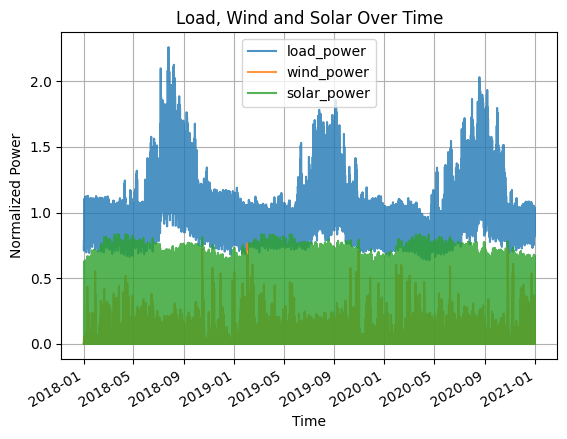

<Figure size 1200x500 with 0 Axes>

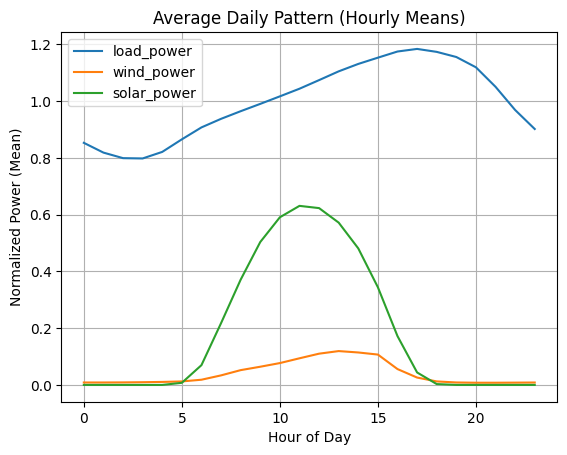

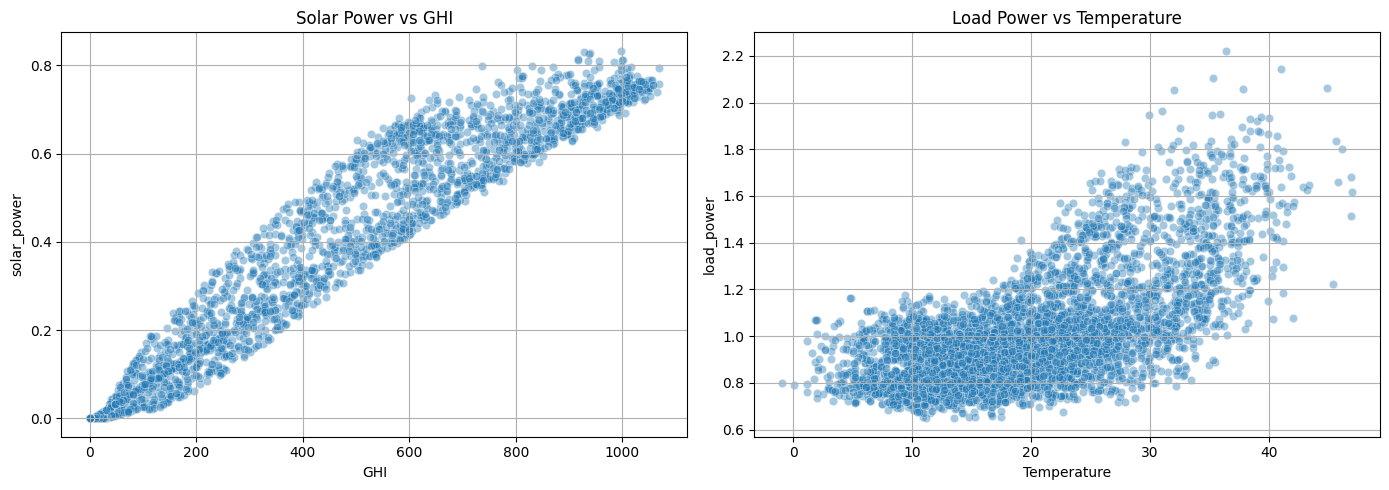

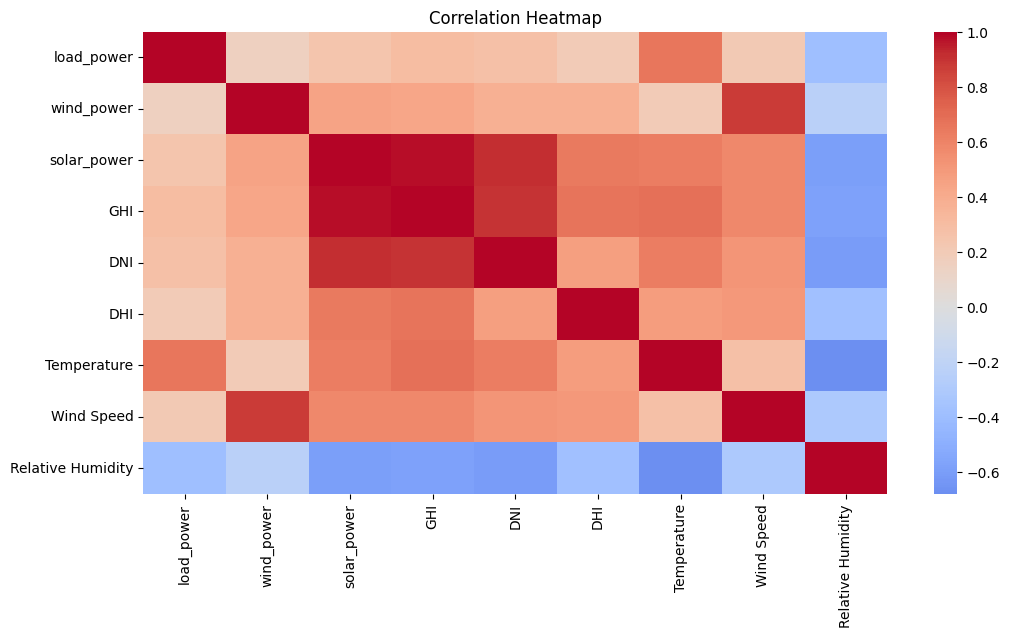

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure datetime
df['time'] = pd.to_datetime(df['time'])
df = df.set_index('time')

# --- 1. Time-Series Plots: Load / Wind / Solar ---
plt.figure(figsize=(16,5))
df[['load_power', 'wind_power', 'solar_power']].plot(alpha=0.8)
plt.title("Load, Wind and Solar Over Time")
plt.xlabel("Time")
plt.ylabel("Normalized Power")
plt.grid(True)
plt.show()

# --- 2. Daily Pattern (Mean by Hour of Day) ---
plt.figure(figsize=(12,5))
df.groupby(df.index.hour)[['load_power', 'wind_power', 'solar_power']].mean().plot()
plt.title("Average Daily Pattern (Hourly Means)")
plt.xlabel("Hour of Day")
plt.ylabel("Normalized Power (Mean)")
plt.grid(True)
plt.show()

# --- 3. Scatter Plots for Key Relationships ---
fig, axes = plt.subplots(1, 2, figsize=(14,5))

sns.scatterplot(ax=axes[0], data=df.sample(5000), x='GHI', y='solar_power', alpha=0.4)
axes[0].set_title("Solar Power vs GHI")
axes[0].grid(True)

sns.scatterplot(ax=axes[1], data=df.sample(5000), x='Temperature', y='load_power', alpha=0.4)
axes[1].set_title("Load Power vs Temperature")
axes[1].grid(True)

plt.tight_layout()
plt.show()

# --- 4. Correlation Heatmap ---
plt.figure(figsize=(12,6))
corr = df[['load_power','wind_power','solar_power','GHI','DNI','DHI','Temperature','Wind Speed','Relative Humidity']].corr()
sns.heatmap(corr, annot=False, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()


## EDA - pf_result_0.csv

In [27]:
path = "/workspaces/amos2025ws03-rtdip-timeseries-forecasting/amos_team_resources/psml/eda/data/PSML/Minute-level PMU Measurements/case 0/pf_result_0.csv"

df = pd.read_csv(path)

In [11]:
# general info
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532374 entries, 0 to 532373
Columns: 116 entries, time to  
dtypes: float64(114), object(2)
memory usage: 471.2+ MB


,Vm_101,Vm_102,Vm_151,Vm_152,Vm_153,Vm_154,Vm_201,Vm_202,Vm_203,Vm_204,...,Q_13_21_1,Q_14_16_1,Q_15_17_1,Q_15_17_2,Q_16_17_1,Q_17_18_1,Q_17_19_1,Q_17_20_1,Q_19_20_1,Q_20_22_1
count,532374.000000,532374.000000,532374.000000,532374.000000,532374.000000,532374.000000,532374.000000,532374.000000,532374.000000,532374.000000,...,532374.000000,532374.000000,532374.000000,532374.000000,532374.000000,532374.000000,532374.000000,532374.000000,532374.000000,532374.000000
mean,0.941631,0.941631,0.950501,0.975277,1.011015,0.954917,0.987514,0.964823,0.922159,0.942708,...,-522.728425,161.515863,180.227304,180.227304,91.780381,50.070700,221.030093,144.116569,66.480113,-8.665311
std,0.086514,0.086514,0.079687,0.065608,0.066408,0.066198,0.079581,0.069391,0.068553,0.068682,...,111.979013,33.769177,38.409797,38.409797,25.922312,11.891840,50.242842,35.135495,24.364994,11.176863
min,0.702962,0.702962,0.723194,0.782178,0.816056,0.763221,0.757014,0.760893,0.723471,0.740019,...,-1029.818359,110.757240,123.834190,123.834190,57.130062,17.458490,145.765152,93.539864,6.617077,-78.977539
25%,0.885952,0.885952,0.901884,0.941248,0.974073,0.919279,0.941594,0.929501,0.885235,0.907951,...,-559.105423,139.254406,155.026779,155.026779,74.449980,42.189853,187.794456,120.369080,50.655496,-12.117067
50%,0.958672,0.958672,0.973372,0.992358,1.026759,0.965356,1.015522,0.983430,0.934637,0.964039,...,-492.615936,152.999016,169.799408,169.799408,83.239441,48.454041,206.776604,133.338409,60.574600,-3.626382
75%,1.020000,1.020000,1.013152,1.015274,1.051043,0.994792,1.040000,1.005957,0.963394,0.980514,...,-449.654266,172.906338,193.042160,193.042160,100.873981,55.751546,239.578896,156.765591,76.539896,-1.230778
max,1.397591,1.397591,1.407833,1.393912,1.438169,1.396969,1.485698,1.413535,1.368744,1.398847,...,-359.526764,319.037354,355.176208,355.176208,211.796524,110.573257,444.795227,313.402557,192.049347,-0.073089


In [12]:
# missing values
df.isna().sum()
df.isna().mean()

time           0.0
 Vm_101        0.0
 Vm_102        0.0
 Vm_151        0.0
 Vm_152        0.0
              ... 
 Q_17_19_1     0.0
 Q_17_20_1     0.0
 Q_19_20_1     0.0
 Q_20_22_1     0.0
               0.0
Length: 116, dtype: float64

In [28]:
df['time'] = pd.to_datetime(df['time'])
df['time'].diff().value_counts()

time
0 days 00:01:00    532372
1 days 00:00:00         1
Name: count, dtype: int64

In [29]:
# Strip ALL whitespace left and right
df.columns = df.columns.str.strip()

vm_cols = [c for c in df.columns if c.startswith("Vm_")]
va_cols = [c for c in df.columns if c.startswith("Va_")]
p_cols  = [c for c in df.columns if c.startswith("P_")]
q_cols  = [c for c in df.columns if c.startswith("Q_")]

Using column samples:
Vm: ['Vm_101', 'Vm_102', 'Vm_151', 'Vm_152', 'Vm_153']
Va: ['Va_101', 'Va_102', 'Va_151', 'Va_152', 'Va_153']
P: ['P_0_2_1', 'P_1_2_1', 'P_2_3_1', 'P_2_3_2', 'P_2_6_1']
Q: ['Q_0_2_1', 'Q_1_2_1', 'Q_2_3_1', 'Q_2_3_2', 'Q_2_6_1']


<Figure size 1600x400 with 0 Axes>

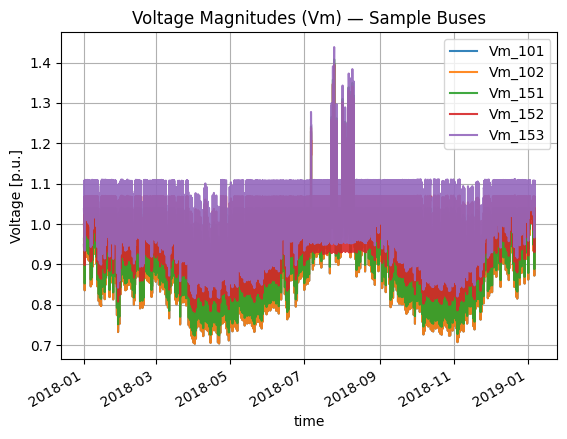

<Figure size 1600x400 with 0 Axes>

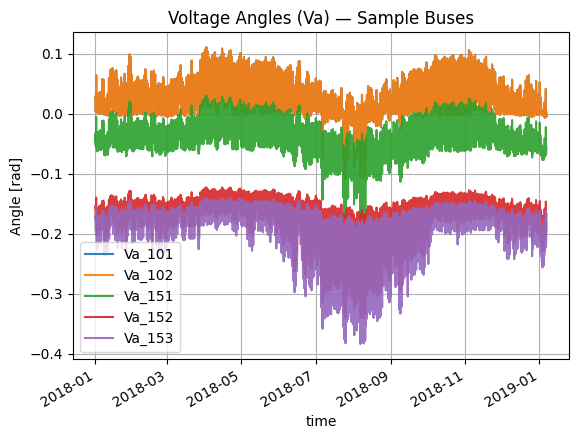

<Figure size 1600x400 with 0 Axes>

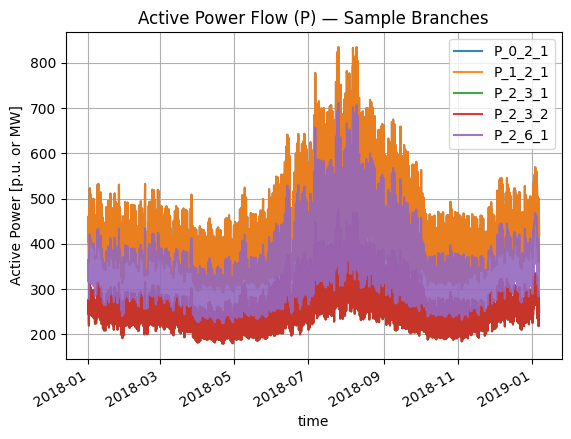

<Figure size 1600x400 with 0 Axes>

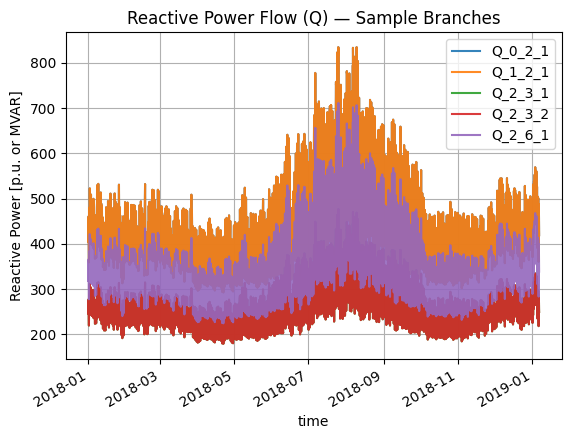

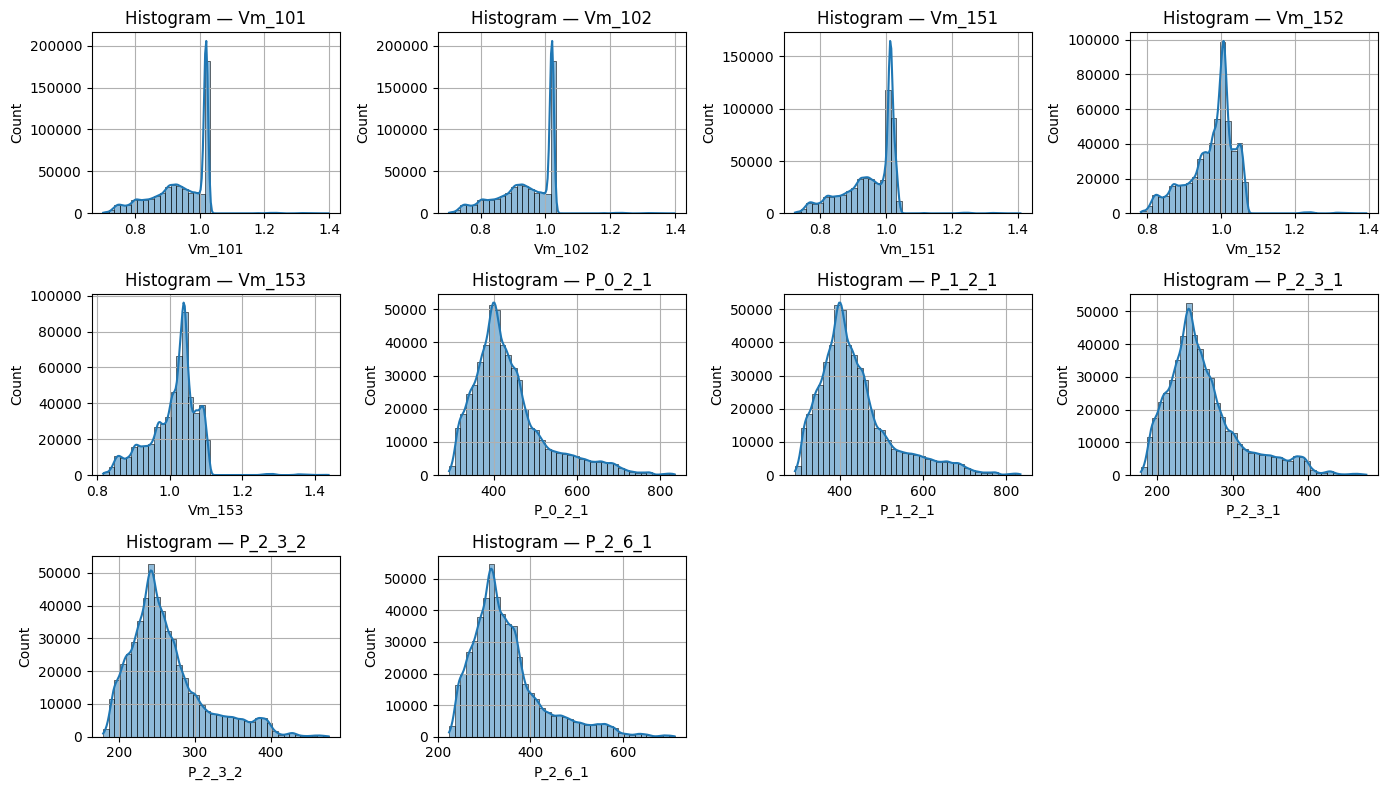

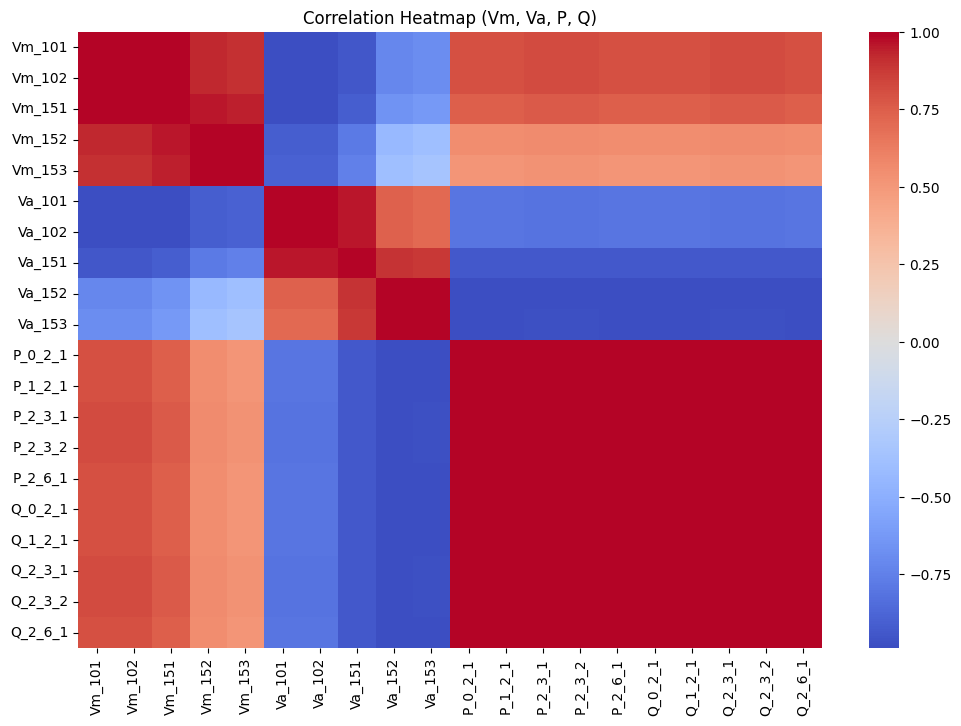

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set datetime index
df['time'] = pd.to_datetime(df['time'])
df = df.set_index('time')

# Take small representative sample
vm_sample = vm_cols[:5]
va_sample = va_cols[:5]
p_sample = p_cols[:5]
q_sample = q_cols[:5]

print("Using column samples:")
print("Vm:", vm_sample)
print("Va:", va_sample)
print("P:", p_sample)
print("Q:", q_sample)


# --- 1. Voltage Magnitude Plot ---
plt.figure(figsize=(16,4))
df[vm_sample].plot(alpha=0.9)
plt.title("Voltage Magnitudes (Vm) — Sample Buses")
plt.ylabel("Voltage [p.u.]")
plt.grid(True)
plt.show()


# --- 2. Voltage Angle Plot ---

plt.figure(figsize=(16,4))
df[va_sample].plot(alpha=0.9)
plt.title("Voltage Angles (Va) — Sample Buses")
plt.ylabel("Angle [rad]")
plt.grid(True)
plt.show()


# --- 3. Active Power Flow Plot (P) ---
plt.figure(figsize=(16,4))
df[p_sample].plot(alpha=0.9)
plt.title("Active Power Flow (P) — Sample Branches")
plt.ylabel("Active Power [p.u. or MW]")
plt.grid(True)
plt.show()


# --- 4. Reactive Power Flow Plot (Q) ---
plt.figure(figsize=(16,4))
df[q_sample].plot(alpha=0.9)
plt.title("Reactive Power Flow (Q) — Sample Branches")
plt.ylabel("Reactive Power [p.u. or MVAR]")
plt.grid(True)
plt.show()


# --- 5. Histograms for Vm + P ---
plt.figure(figsize=(14,8))

for i, col in enumerate(vm_sample + p_sample):
    plt.subplot(3,4,i+1)
    sns.histplot(df[col], kde=True, bins=40)
    plt.title(f"Histogram — {col}")
    plt.grid(True)

plt.tight_layout()
plt.show()


# --- 6. Correlation Heatmap ---
corr_cols = vm_sample + va_sample + p_sample + q_sample

plt.figure(figsize=(12,8))
sns.heatmap(df[corr_cols].corr(), cmap="coolwarm", center=0, annot=False)
plt.title("Correlation Heatmap (Vm, Va, P, Q)")
plt.show()


## EDA - Natural Oscillation: row_1

In [31]:
path_dist = "/workspaces/amos2025ws03-rtdip-timeseries-forecasting/amos_team_resources/psml/eda/data/PSML/Millisecond-level PMU Measurements/Natural Oscillation/row_1/dist.csv"
path_info = "/workspaces/amos2025ws03-rtdip-timeseries-forecasting/amos_team_resources/psml/eda/data/PSML/Millisecond-level PMU Measurements/Natural Oscillation/row_1/info.csv"
path_trans = "/workspaces/amos2025ws03-rtdip-timeseries-forecasting/amos_team_resources/psml/eda/data/PSML/Millisecond-level PMU Measurements/Natural Oscillation/row_1/trans.csv"

In [34]:
df_info = pd.read_csv(path_info)

In [35]:
# general info
df_info.head()
df_info.info()
df_info.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   datetime        5 non-null      object
 1    2019/1/1 0:10  5 non-null      object
dtypes: object(2)
memory usage: 212.0+ bytes


,datetime,2019/1/1 0:10
count,5,5
unique,5,4
top,bus1,-1
freq,1,2


In [40]:
# missing values
df_info.isna().sum()
df_info.isna().mean()

datetime          0.0
 2019/1/1 0:10    0.0
dtype: float64

In [36]:
df_dist = pd.read_csv(path_dist)

In [37]:
# general info
df_dist.head()
df_dist.info()
df_dist.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 83 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Time(s)            960 non-null    float64
 1    3005.sourcebus.1  960 non-null    float64
 2    3005.sourcebus.2  960 non-null    float64
 3    3005.sourcebus.3  960 non-null    float64
 4    3005.650.1        960 non-null    float64
 5    3005.650.2        960 non-null    float64
 6    3005.650.3        960 non-null    float64
 7    3005.rg60.1       960 non-null    float64
 8    3005.rg60.2       960 non-null    float64
 9    3005.rg60.3       960 non-null    float64
 10   3005.633.1        960 non-null    float64
 11   3005.633.2        960 non-null    float64
 12   3005.633.3        960 non-null    float64
 13   3005.634.1        960 non-null    float64
 14   3005.634.2        960 non-null    float64
 15   3005.634.3        960 non-null    float64
 16   3005.671.1        960 non

,Time(s),3005.sourcebus.1,3005.sourcebus.2,3005.sourcebus.3,3005.650.1,3005.650.2,3005.650.3,3005.rg60.1,3005.rg60.2,3005.rg60.3,...,3008.670.2,3008.670.3,3008.632.1,3008.632.2,3008.632.3,3008.680.1,3008.680.2,3008.680.3,3008.684.1,3008.684.3
count,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,...,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000
mean,1.000000,0.974266,0.974438,0.974152,0.974115,0.974411,0.974287,0.989609,0.989172,0.989738,...,0.962556,0.957020,0.959166,0.962033,0.958250,0.956572,0.963904,0.954987,0.956337,0.954783
std,0.577654,0.182616,0.182609,0.182613,0.182612,0.182608,0.182604,0.109897,0.109422,0.109854,...,0.131193,0.130992,0.131223,0.131203,0.131148,0.130747,0.131199,0.130722,0.130714,0.130708
min,0.000000,0.701400,0.701600,0.701300,0.701300,0.701600,0.701500,0.771500,0.771800,0.771600,...,0.683400,0.679200,0.680500,0.682800,0.679800,0.679500,0.684900,0.678300,0.679300,0.678100
25%,0.500000,0.822750,0.822875,0.822575,0.822550,0.822850,0.822750,0.904725,0.905050,0.904925,...,0.895800,0.889300,0.891900,0.895500,0.890900,0.888400,0.896700,0.886600,0.888200,0.886400
50%,1.000000,0.988900,0.989100,0.988800,0.988700,0.989100,0.988900,1.051300,1.046750,1.051450,...,1.051900,1.046700,1.048700,1.050300,1.047900,1.046250,1.053650,1.044850,1.046000,1.044650
75%,1.500000,1.149025,1.149150,1.148925,1.148850,1.149150,1.149025,1.061925,1.060525,1.062000,...,1.057925,1.053425,1.055500,1.057525,1.054500,1.053500,1.059500,1.051800,1.053200,1.051600
max,2.000000,1.300700,1.300800,1.300500,1.300500,1.300800,1.300700,1.170400,1.170700,1.170500,...,1.146200,1.139300,1.141800,1.145800,1.140800,1.138100,1.147300,1.136600,1.137800,1.136300


In [41]:
# missing values
df_dist.isna().sum()
df_dist.isna().mean()

Time(s)              0.0
 3005.sourcebus.1    0.0
 3005.sourcebus.2    0.0
 3005.sourcebus.3    0.0
 3005.650.1          0.0
                    ... 
 3008.680.1          0.0
 3008.680.2          0.0
 3008.680.3          0.0
 3008.684.1          0.0
 3008.684.3          0.0
Length: 83, dtype: float64

In [59]:
df_trans = pd.read_csv(path_trans)

In [47]:
# general info
df_trans.head()
df_trans.info()
df_trans.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 92 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Time(s)                       960 non-null    float64
 1    VOLT 101 [NUC-A 21.600]      960 non-null    float64
 2    VOLT 102 [NUC-B 21.600]      960 non-null    float64
 3    VOLT 151 [NUCPANT 500.00]    960 non-null    float64
 4    VOLT 152 [MID500 500.00]     960 non-null    float64
 5    VOLT 153 [MID230 230.00]     960 non-null    float64
 6    VOLT 154 [DOWNTN 230.00]     960 non-null    float64
 7    VOLT 201 [HYDRO 500.00]      960 non-null    float64
 8    VOLT 202 [EAST500 500.00]    960 non-null    float64
 9    VOLT 203 [EAST230 230.00]    960 non-null    float64
 10   VOLT 204 [SUB500 500.00]     960 non-null    float64
 11   VOLT 205 [SUB230 230.00]     960 non-null    float64
 12   VOLT 206 [URBGEN 18.000]     960 non-null    float64
 13   VOLT

,Time(s),VOLT 101 [NUC-A 21.600],VOLT 102 [NUC-B 21.600],VOLT 151 [NUCPANT 500.00],VOLT 152 [MID500 500.00],VOLT 153 [MID230 230.00],VOLT 154 [DOWNTN 230.00],VOLT 201 [HYDRO 500.00],VOLT 202 [EAST500 500.00],VOLT 203 [EAST230 230.00],...,POWR 3005 TO 3006 CKT '1 ',VARS 3005 TO 3006 CKT '1 ',POWR 3005 TO 3007 CKT '1 ',VARS 3005 TO 3007 CKT '1 ',POWR 3005 TO 3008 CKT '1 ',VARS 3005 TO 3008 CKT '1 ',POWR 3007 TO 3008 CKT '1 ',VARS 3007 TO 3008 CKT '1 ',POWR 3008 TO 3018 CKT '1 ',VARS 3008 TO 3018 CKT '1 '
count,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,...,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000
mean,1.997916,0.899440,0.899440,0.908030,0.936686,0.970319,0.903808,0.944895,0.127156,0.843103,...,26.521147,-20.332823,227.971447,83.918864,164.556533,60.605673,100.765463,33.700326,-30.126081,-8.945398
std,1.155301,0.136020,0.136020,0.149327,0.184486,0.196312,0.210558,0.154959,0.321463,0.220596,...,20.318759,35.916470,68.485181,51.802017,54.631311,38.109411,40.813159,27.919263,17.389742,45.816353
min,0.000000,0.728900,0.728900,0.712800,0.660400,0.665600,0.535900,0.733800,0.000000,0.462400,...,-12.084500,-89.693900,100.424300,-29.701800,67.864800,-20.689600,34.642800,-31.199800,-59.598100,-61.768000
25%,0.998950,0.772500,0.772500,0.769175,0.787475,0.824375,0.784925,0.801900,0.000000,0.705675,...,15.957900,-50.163250,184.973300,65.345650,122.343200,42.548550,59.677800,21.568425,-36.282750,-51.612350
50%,1.997900,0.895300,0.895300,0.910900,0.951300,0.988400,0.923150,0.950500,0.000000,0.848850,...,24.443500,-20.501400,224.900900,82.400300,162.500300,56.749850,99.636650,35.124200,-28.808000,-2.652200
75%,2.996850,1.034275,1.034275,1.054450,1.113800,1.157200,1.091550,1.096150,0.000000,1.032500,...,47.218650,12.317900,267.090500,110.858725,195.103075,84.115950,123.349675,55.773025,-28.197500,36.178225
max,3.995800,1.143300,1.143300,1.175600,1.265300,1.318400,1.266100,1.223800,0.939000,1.217800,...,58.116200,34.436100,348.627400,167.212900,263.385800,123.630000,176.621300,76.359900,6.126400,83.791000


In [48]:
# missing values
df_trans.isna().sum()
df_trans.isna().mean()

Time(s)                        0.0
 VOLT 101 [NUC-A 21.600]       0.0
 VOLT 102 [NUC-B 21.600]       0.0
 VOLT 151 [NUCPANT 500.00]     0.0
 VOLT 152 [MID500 500.00]      0.0
                              ... 
 VARS 3005 TO 3008 CKT '1 '    0.0
 POWR 3007 TO 3008 CKT '1 '    0.0
 VARS 3007 TO 3008 CKT '1 '    0.0
 POWR 3008 TO 3018 CKT '1 '    0.0
 VARS 3008 TO 3018 CKT '1 '    0.0
Length: 92, dtype: float64

VOLT sample: ['VOLT 101 [NUC-A 21.600]', 'VOLT 102 [NUC-B 21.600]', 'VOLT 151 [NUCPANT 500.00]']
POWR sample: ["POWR 101 TO 151 CKT '1 '", "POWR 102 TO 151 CKT '1 '", "POWR 151 TO 152 CKT '1 '"]
VARS sample: ["VARS 101 TO 151 CKT '1 '", "VARS 102 TO 151 CKT '1 '", "VARS 151 TO 152 CKT '1 '"]


/tmp/ipykernel_6751/3599108507.py:22: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  df_trans["Time(s)"] = pd.to_datetime(


<Figure size 1600x400 with 0 Axes>

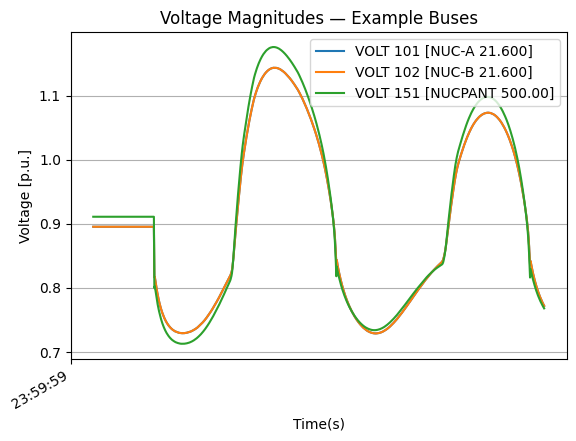

<Figure size 1600x400 with 0 Axes>

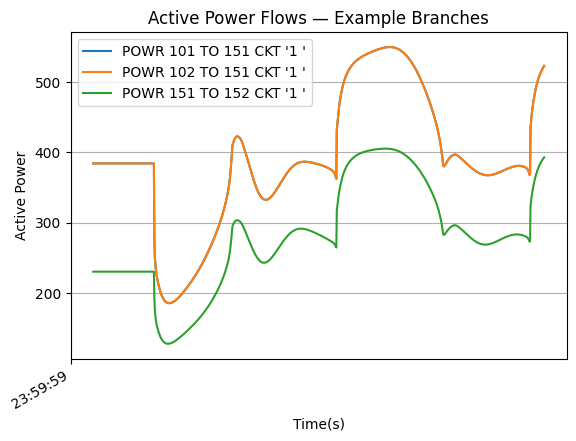

<Figure size 1600x400 with 0 Axes>

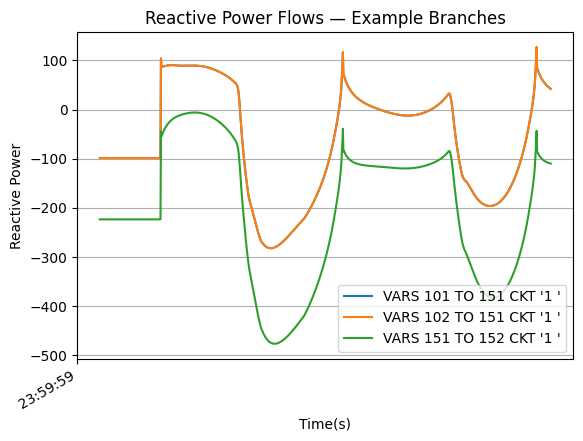

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Clean column names
df_trans.columns = df_trans.columns.str.strip()

# Identify groups
volt_cols = [c for c in df_trans.columns if c.startswith("VOLT")]
powr_cols = [c for c in df_trans.columns if c.startswith("POWR")]
vars_cols = [c for c in df_trans.columns if c.startswith("VARS")]

# Take examples
volt_sample = volt_cols[:3]
powr_sample = powr_cols[:3]
vars_sample = vars_cols[:3]

print("VOLT sample:", volt_sample)
print("POWR sample:", powr_sample)
print("VARS sample:", vars_sample)

# Fix time column
df_trans["Time(s)"] = pd.to_datetime(
    df_trans["Time(s)"], unit="s", origin="unix", errors="ignore"
)
df_trans = df_trans.set_index("Time(s)")


# --- 1. VOLT plot (3 signals) ---
plt.figure(figsize=(16,4))
df_trans[volt_sample].plot()
plt.title("Voltage Magnitudes — Example Buses")
plt.ylabel("Voltage [p.u.]")
plt.grid(True)
plt.show()

# --- 2. POWR plot (3 signals) ---
plt.figure(figsize=(16,4))
df_trans[powr_sample].plot()
plt.title("Active Power Flows — Example Branches")
plt.ylabel("Active Power")
plt.grid(True)
plt.show()

# --- 3. VARS plot (3 signals) ---
plt.figure(figsize=(16,4))
df_trans[vars_sample].plot()
plt.title("Reactive Power Flows — Example Branches")
plt.ylabel("Reactive Power")
plt.grid(True)
plt.show()
